<a href="https://colab.research.google.com/github/mukul-anissh/Trees-and-Random-Forests/blob/main/Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "johnsmith88/heart-disease-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-1-10f411ed6ab2>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree.predict(x_test))

1.0

[Text(0.4921875, 0.95, 'x[2] <= 0.5\ngini = 0.498\nsamples = 820\nvalue = [386, 434]'),
 Text(0.28958333333333336, 0.85, 'x[11] <= 0.5\ngini = 0.37\nsamples = 383\nvalue = [289, 94]'),
 Text(0.39088541666666665, 0.8999999999999999, 'True  '),
 Text(0.1875, 0.75, 'x[12] <= 2.5\ngini = 0.499\nsamples = 168\nvalue = [87.0, 81.0]'),
 Text(0.09166666666666666, 0.65, 'x[8] <= 0.5\ngini = 0.37\nsamples = 94\nvalue = [23, 71]'),
 Text(0.03333333333333333, 0.55, 'x[7] <= 96.5\ngini = 0.177\nsamples = 61\nvalue = [6, 55]'),
 Text(0.016666666666666666, 0.45, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05, 0.45, 'x[4] <= 316.5\ngini = 0.098\nsamples = 58\nvalue = [3, 55]'),
 Text(0.03333333333333333, 0.35, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(0.06666666666666667, 0.35, 'x[0] <= 61.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15,

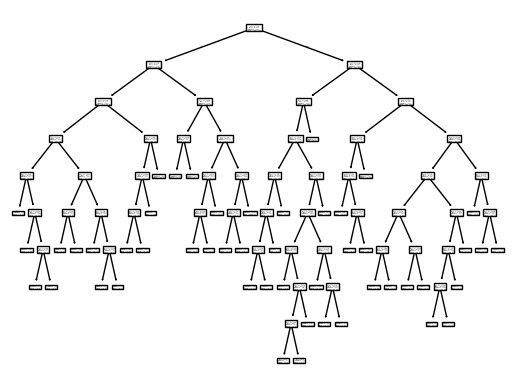

In [8]:
from sklearn.tree import plot_tree
plot_tree(tree)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [10]:
print(classification_report(y_train, tree.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       434

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [11]:
# the perfect scores on the training set and extremely large tree shows overfitting
from sklearn.model_selection import GridSearchCV
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_leaf_nodes': [None, 5, 10, 15, 20]
}
grid = GridSearchCV(tree, param, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [12]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [13]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [14]:
print(classification_report(y_train, grid.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       434

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



[Text(0.46240234375, 0.9444444444444444, 'x[2] <= 0.5\nentropy = 0.998\nsamples = 820\nvalue = [386, 434]'),
 Text(0.24609375, 0.8333333333333334, 'x[11] <= 0.5\nentropy = 0.804\nsamples = 383\nvalue = [289, 94]'),
 Text(0.354248046875, 0.8888888888888888, 'True  '),
 Text(0.15625, 0.7222222222222222, 'x[12] <= 2.5\nentropy = 0.999\nsamples = 168\nvalue = [87.0, 81.0]'),
 Text(0.078125, 0.6111111111111112, 'x[8] <= 0.5\nentropy = 0.803\nsamples = 94\nvalue = [23, 71]'),
 Text(0.03125, 0.5, 'x[0] <= 60.0\nentropy = 0.464\nsamples = 61\nvalue = [6, 55]'),
 Text(0.015625, 0.3888888888888889, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.046875, 0.3888888888888889, 'x[7] <= 98.0\nentropy = 0.918\nsamples = 18\nvalue = [6, 12]'),
 Text(0.03125, 0.2777777777777778, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.0625, 0.2777777777777778, 'x[0] <= 61.5\nentropy = 0.722\nsamples = 15\nvalue = [3, 12]'),
 Text(0.046875, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue =

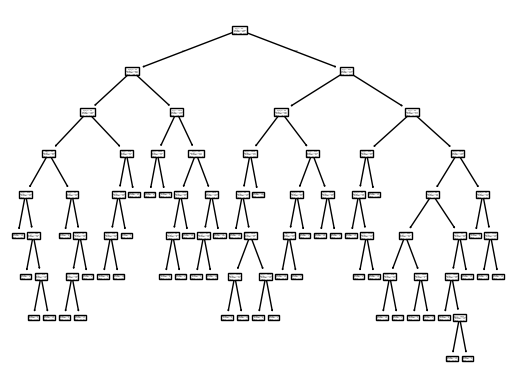

In [15]:
plot_tree(grid.best_estimator_)

In [16]:
grid.best_score_

np.float64(0.9817073170731707)

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [19]:
# feature importance
forest.feature_importances_

array([0.08124781, 0.03403409, 0.15962969, 0.06901052, 0.08376075,
       0.01006563, 0.01783843, 0.12265406, 0.04575327, 0.10431152,
       0.03729106, 0.12611857, 0.10828459])

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest, x_train, y_train, cv=5).mean()

np.float64(0.9829268292682926)